In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.cross_decomposition import PLSRegression
from numpy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_excel("single_name_return_data.xlsx", sheet_name="total returns").set_index("Date")
data.head(5)

,AAPL,AMZN,BA,BAC,C,CVX,DUK,EOG,FB,GS,...,MSFT,NEE,PFE,SHV,SPY,TMO,UNH,UPS,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-31,0.045822,0.021677,-0.005249,-0.102690,-0.010215,0.038673,-0.020237,0.089705,-0.301929,0.052576,...,-0.036613,0.030373,0.045217,0.000000,0.011829,0.072433,-0.126667,-0.039995,0.044002,0.014959
2012-08-31,0.093877,0.064166,-0.028167,0.088556,0.095507,0.031739,-0.033419,0.104989,-0.168125,0.052375,...,0.052738,-0.042232,0.001679,0.000181,0.025053,0.030178,0.062831,-0.016486,-0.004667,0.011714
2012-09-30,0.002796,0.024369,-0.025210,0.106515,0.101313,0.039229,0.000154,0.034626,0.199336,0.075293,...,-0.034394,0.044867,0.041492,-0.000081,0.025351,0.028059,0.024575,-0.030348,0.047018,0.047537
2012-10-31,-0.107600,-0.084264,0.012069,0.055493,0.142726,-0.054221,0.013891,0.041252,-0.025392,0.076619,...,-0.040994,-0.003839,0.000805,-0.000073,-0.018199,0.037906,0.010648,0.023474,0.033363,-0.003062
2012-11-30,-0.012374,0.082271,0.060996,0.057940,-0.075174,-0.033007,-0.016332,0.009700,0.326386,-0.033504,...,-0.059609,-0.010515,0.015068,0.000091,0.005660,0.040780,-0.028750,0.006248,0.081419,-0.027182


# 1 Penalized Regression

## 1

### a)

In [3]:
y = data['PFE']
X = data.drop(columns=['PFE'])
model_ols = LinearRegression().fit(X,y)

In [4]:
params_ols = pd.DataFrame(index=X.columns, columns=['Intercept', 'Beta'])
params_ols['Intercept'] = model_ols.intercept_
params_ols['Beta'] = model_ols.coef_
params_ols

,Intercept,Beta
AAPL,0.001435,-0.090211
AMZN,0.001435,0.085638
BA,0.001435,-0.097980
BAC,0.001435,0.063022
C,0.001435,-0.013769
CVX,0.001435,0.275373
DUK,0.001435,-0.022501
EOG,0.001435,-0.055048
FB,0.001435,-0.058740
GS,0.001435,-0.169621


### b)

In [5]:
model_ols.score(X, y)

0.5872971514338966

### c)

In [6]:
params_ols['Beta'].abs().idxmax()

'SHV'

### d)

In [7]:
params_ols['Beta*vol'] = params_ols['Beta'] * X.std()
params_ols

,Intercept,Beta,Beta*vol
AAPL,0.001435,-0.090211,-0.007262
AMZN,0.001435,0.085638,0.006911
BA,0.001435,-0.097980,-0.009843
BAC,0.001435,0.063022,0.005161
C,0.001435,-0.013769,-0.001236
CVX,0.001435,0.275373,0.019337
DUK,0.001435,-0.022501,-0.001038
EOG,0.001435,-0.055048,-0.005808
FB,0.001435,-0.058740,-0.006040
GS,0.001435,-0.169621,-0.013066


In [8]:
params_ols['Beta*vol'].abs().idxmax()

'SPY'

## 2

### a)

In [9]:
model_ridge = Ridge(alpha=0.5).fit(X,y)

In [10]:
params_ridge = pd.DataFrame(index=X.columns, columns=['Intercept', 'Beta'])
params_ridge['Intercept'] = model_ridge.intercept_
params_ridge['Beta'] = model_ridge.coef_
params_ridge

,Intercept,Beta
AAPL,-0.001788,-0.015984
AMZN,-0.001788,0.078043
BA,-0.001788,-0.033985
BAC,-0.001788,0.024545
C,-0.001788,0.020820
CVX,-0.001788,0.059144
DUK,-0.001788,0.055371
EOG,-0.001788,0.011660
FB,-0.001788,-0.003222
GS,-0.001788,-0.009075


### b)

In [11]:
model_ridge.score(X, y)

0.4425757625898634

### c)

In [12]:
params_ridge['Beta*vol'] = params_ridge['Beta'] * X.std()
params_ridge

,Intercept,Beta,Beta*vol
AAPL,-0.001788,-0.015984,-1.286743e-03
AMZN,-0.001788,0.078043,6.297950e-03
BA,-0.001788,-0.033985,-3.414080e-03
BAC,-0.001788,0.024545,2.009953e-03
C,-0.001788,0.020820,1.869089e-03
CVX,-0.001788,0.059144,4.153252e-03
DUK,-0.001788,0.055371,2.554746e-03
EOG,-0.001788,0.011660,1.230251e-03
FB,-0.001788,-0.003222,-3.312971e-04
GS,-0.001788,-0.009075,-6.990443e-04


In [13]:
params_ridge['Beta*vol'].abs().idxmax()

'AMZN'

## 3

### a)

In [14]:
model_lasso = Lasso(alpha=3e-4).fit(X,y)

In [15]:
params_lasso = pd.DataFrame(index=X.columns, columns=['Intercept', 'Beta'])
params_lasso['Intercept'] = model_lasso.intercept_
params_lasso['Beta'] = model_lasso.coef_
params_lasso

,Intercept,Beta
AAPL,-0.002793,-0.000000
AMZN,-0.002793,0.052032
BA,-0.002793,-0.000000
BAC,-0.002793,0.000000
C,-0.002793,0.000000
CVX,-0.002793,0.064272
DUK,-0.002793,0.000000
EOG,-0.002793,0.000000
FB,-0.002793,-0.000000
GS,-0.002793,0.000000


### b)

In [16]:
model_lasso.score(X, y)

0.45491992422884997

### c)

In [17]:
params_lasso['Beta*vol'] = params_lasso['Beta'] * X.std()
params_lasso

,Intercept,Beta,Beta*vol
AAPL,-0.002793,-0.000000,-0.000000
AMZN,-0.002793,0.052032,0.004199
BA,-0.002793,-0.000000,-0.000000
BAC,-0.002793,0.000000,0.000000
C,-0.002793,0.000000,0.000000
CVX,-0.002793,0.064272,0.004513
DUK,-0.002793,0.000000,0.000000
EOG,-0.002793,0.000000,0.000000
FB,-0.002793,-0.000000,-0.000000
GS,-0.002793,0.000000,0.000000


In [18]:
params_lasso['Beta*vol'].abs().idxmax()

'JNJ'

### d)

In [19]:
(params_lasso['Beta']!=0).sum()

7

### e)

In [20]:
penalty = 1000
while (Lasso(alpha=penalty*1e-6).fit(X,y).coef_ != 0).sum() != 3:
    penalty += 1

In [21]:
print(f'The penalty is: {penalty*1e-6}')

The penalty is: 0.0012929999999999999


## 4

### a)

In [22]:
iterables = [["OLS", "Ridge", "LASSO"], ["Intercept", "Beta"]]
params = pd.DataFrame(columns=pd.MultiIndex.from_product(iterables), index=X.columns)
params['OLS'] = params_ols[['Intercept', 'Beta']]
params['Ridge'] = params_ridge[['Intercept', 'Beta']]
params['LASSO'] = params_lasso[['Intercept', 'Beta']]
params

OLS               Ridge               LASSO          
     Intercept      Beta Intercept      Beta Intercept      Beta
AAPL  0.001435 -0.090211 -0.001788 -0.015984 -0.002793 -0.000000
AMZN  0.001435  0.085638 -0.001788  0.078043 -0.002793  0.052032
BA    0.001435 -0.097980 -0.001788 -0.033985 -0.002793 -0.000000
BAC   0.001435  0.063022 -0.001788  0.024545 -0.002793  0.000000
C     0.001435 -0.013769 -0.001788  0.020820 -0.002793  0.000000
CVX   0.001435  0.275373 -0.001788  0.059144 -0.002793  0.064272
DUK   0.001435 -0.022501 -0.001788  0.055371 -0.002793  0.000000
EOG   0.001435 -0.055048 -0.001788  0.011660 -0.002793  0.000000
FB    0.001435 -0.058740 -0.001788 -0.003222 -0.002793 -0.000000
GS    0.001435 -0.169621 -0.001788 -0.009075 -0.002793  0.000000
HON   0.001435 -0.003581 -0.001788  0.059458 -0.002793  0.050111
JNJ   0.001435  0.408252 -0.001788  0.107750 -0.002793  0.310078
JPM   0.001435  0.110372 -0.001788  0.038267 -0.002793  0.000000
MS    0.001435 -0.044108 -0.001788  0.002904 -0.002793  0.000000
MSFT  0.001435 -0.303362 -0.001788 -0.040859 -0.002793 -0.000000
NEE   0.001435  0.013163 -0.001788  0.058714 -0.002793  0.000000
SHV   0.001435 -5.954589 -0.001788 -0.000390 -0.002793 -0.000000
SPY   0.001435  0.869191 -0.001788  0.043878 -0.002793  0.000000
TMO   0.001435  0.133241 -0.001788  0.098968 -0.002793  0.162022
UNH   0.001435  0.085091 -0.001788  0.085974 -0.002793  0.126808
UPS   0.001435 -0.015655 -0.001788  0.042997 -0.002793  0.003308
V     0.001435  0.086229 -0.001788  0.032910 -0.002793  0.000000
XOM   0.001435 -0.236130 -0.001788  0.012382 -0.002793  0.000000

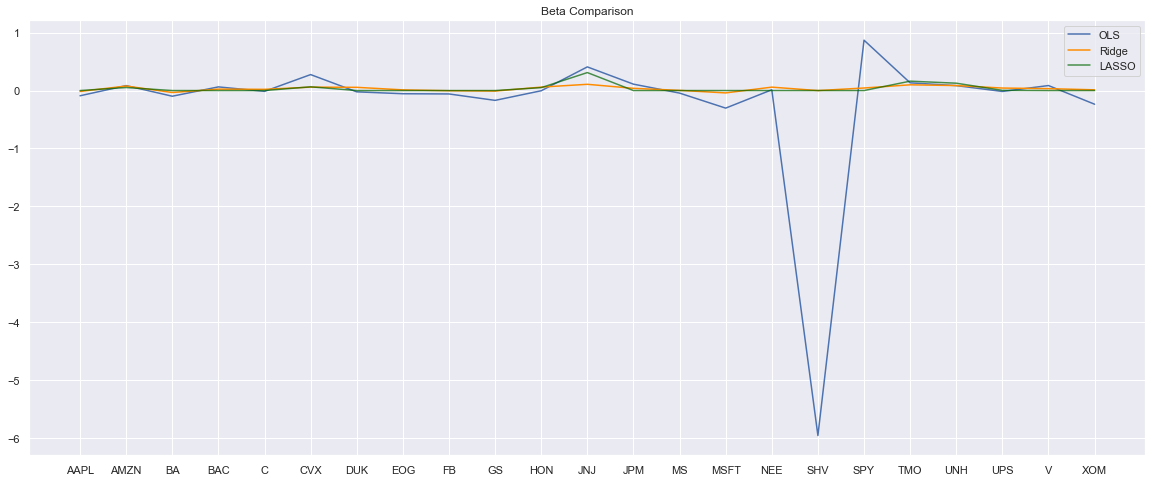

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(params[('OLS', 'Beta')])
ax.plot(params[('Ridge', 'Beta')], color='darkorange')
ax.plot(params[('LASSO', 'Beta')], color='darkgreen', alpha=0.7)
ax.legend(['OLS', 'Ridge', 'LASSO'])
ax.set_title("Beta Comparison")
plt.show()

- Only LASSO gives us zero estimated betas 
- They all gives both positive and negative values
- Ridge and LASSO yield smaller variation magnitude, comparing to OLS

### b)

OLS gives the largest R-squared. This is not surprising since both Ridge and LASSO are penalizing the betas from being too influencial to the fitting. In other words, OLS is more prone to overfit the dataset, and therefore is reasonable to have a higher in-sample R-squared.

## 5

In [24]:
X_train = X[:"2018"].copy()
y_train = y[:"2018"].copy()
X_test = X["2019":].copy()
y_test = y["2019":].copy()

In [25]:
LinearRegression().fit(X_train,y_train).score(X_test,y_test)

0.3128123549915094

In [26]:
Ridge(alpha=0.5).fit(X_train,y_train).score(X_test,y_test)

0.2757460861931377

In [27]:
Lasso(alpha=3e-4).fit(X_train,y_train).score(X_test,y_test)

0.3120768602742625

OLS appears to have the best OOS R-squared, but of course this greatly depends on what penalization parameter we choose. If we choose difference alphas, Ridge or LASSO may perform better in OOS estimations.

## 6

In [28]:
model_ridgeCV = RidgeCV().fit(X,y)
model_ridgeCV.alpha_
model_ridgeCV.score(X_test, y_test)

0.574914745699142

In [29]:
model_lassoCV = LassoCV().fit(X,y)
model_lassoCV.alpha_
model_lassoCV.score(X_test, y_test)

0.5152205301955729

# 2 Principal Components

In [30]:
equities = data.drop(columns=['SPY', 'SHV'])
equities.head(5)

,AAPL,AMZN,BA,BAC,C,CVX,DUK,EOG,FB,GS,...,JPM,MS,MSFT,NEE,PFE,TMO,UNH,UPS,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-31,0.045822,0.021677,-0.005249,-0.102690,-0.010215,0.038673,-0.020237,0.089705,-0.301929,0.052576,...,0.015958,-0.060127,-0.036613,0.030373,0.045217,0.072433,-0.126667,-0.039995,0.044002,0.014959
2012-08-31,0.093877,0.064166,-0.028167,0.088556,0.095507,0.031739,-0.033419,0.104989,-0.168125,0.052375,...,0.031666,0.098096,0.052738,-0.042232,0.001679,0.030178,0.062831,-0.016486,-0.004667,0.011714
2012-09-30,0.002796,0.024369,-0.025210,0.106515,0.101313,0.039229,0.000154,0.034626,0.199336,0.075293,...,0.089930,0.116000,-0.034394,0.044867,0.041492,0.028059,0.024575,-0.030348,0.047018,0.047537
2012-10-31,-0.107600,-0.084264,0.012069,0.055493,0.142726,-0.054221,0.013891,0.041252,-0.025392,0.076619,...,0.037249,0.041287,-0.040994,-0.003839,0.000805,0.037906,0.010648,0.023474,0.033363,-0.003062
2012-11-30,-0.012374,0.082271,0.060996,0.057940,-0.075174,-0.033007,-0.016332,0.009700,0.326386,-0.033504,...,-0.014395,-0.029344,-0.059609,-0.010515,0.015068,0.040780,-0.028750,0.006248,0.081419,-0.027182


## 1

In [31]:
clean = equities - equities.mean()

In [32]:
u, s, vh = svd(clean)

In [33]:
factors = clean @ vh.T
factors.columns = np.arange(1,23)
factors

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-31,0.100321,0.191194,-0.127657,0.224495,-0.107962,-0.055109,-0.017283,-0.088956,-0.027479,-0.166297,...,0.056321,0.005329,-0.024710,0.002121,-0.008429,0.025162,0.037482,0.047507,0.013577,0.013919
2012-08-31,-0.093152,0.140681,-0.141271,0.010891,-0.093285,-0.110789,-0.028318,-0.019877,0.083100,-0.010927,...,0.010125,0.039513,0.002229,0.011445,0.029783,0.020677,-0.026223,-0.017920,0.003575,-0.017197
2012-09-30,-0.159468,-0.029826,0.098390,-0.168551,-0.017551,0.030655,0.007980,-0.057431,-0.009034,-0.018465,...,0.004353,-0.030354,-0.022978,-0.022748,0.030354,-0.023352,-0.023956,-0.000859,0.015238,0.007404
2012-10-31,-0.028983,0.164929,0.012199,-0.080515,0.014877,0.097195,-0.018747,0.004250,-0.016261,-0.047642,...,0.037821,0.031651,-0.073847,0.062830,-0.048856,0.019210,-0.052455,0.009320,-0.000979,0.002572
2012-11-30,0.014028,-0.205469,0.217231,-0.084005,0.107154,0.000600,-0.069108,0.034436,-0.017693,-0.034530,...,0.057076,-0.027170,0.006416,-0.064056,-0.033502,-0.001101,0.026544,-0.027866,0.026400,0.020122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,-0.372838,0.335383,0.139549,-0.026264,-0.052281,-0.121068,-0.025709,0.086073,-0.055353,0.030766,...,-0.019088,-0.017686,-0.042579,-0.073524,-0.019790,-0.011698,0.009586,-0.016131,0.003191,0.004194
2021-03-31,-0.228194,-0.014366,0.116946,0.046203,0.081276,0.144510,0.044792,0.029363,0.072187,0.056817,...,0.026751,-0.015641,0.014089,0.013145,-0.025525,0.055686,0.001700,-0.012403,-0.035163,0.000218
2021-04-30,-0.093542,-0.162483,-0.066972,-0.046543,-0.099481,0.021565,0.008280,0.136889,-0.037869,-0.014937,...,-0.005659,0.025855,0.033333,-0.016342,-0.019541,0.024882,-0.021935,-0.013440,-0.042620,-0.003327


## 2

In [34]:
report = pd.DataFrame(index=factors.columns, columns=['Eigen Value', 'Percentage Explained'])
report['Eigen Value'] = s**2
report['Percentage Explained'] = s**2 / (s**2).sum()
report

,Eigen Value,Percentage Explained
1,5.545562,0.452709
2,1.367997,0.111676
3,0.853784,0.069698
4,0.780846,0.063744
5,0.700834,0.057212
6,0.563281,0.045983
7,0.421317,0.034394
8,0.338913,0.027667
9,0.279501,0.022817
10,0.216742,0.017694


## 3

In [35]:
report['Percentage Explained'].cumsum()

1     0.452709
2     0.564385
3     0.634083
4     0.697827
5     0.755039
6     0.801022
7     0.835416
8     0.863083
9     0.885900
10    0.903594
11    0.918237
12    0.931861
13    0.943474
14    0.954097
15    0.963630
16    0.971536
17    0.978150
18    0.984032
19    0.988653
20    0.993251
21    0.997110
22    1.000000
Name: Percentage Explained, dtype: float64

We need the first 5 PCs to explain at least 75% of the variation

## 4

In [36]:
correlations = factors[[1]].merge(equities, how='left', left_index=True, right_index=True).corr().iloc[0,1:]
correlations

AAPL   -0.412203
AMZN   -0.457428
BA     -0.660608
BAC    -0.826640
C      -0.910205
CVX    -0.788713
DUK    -0.063091
EOG    -0.798226
FB     -0.403273
GS     -0.842413
HON    -0.807103
JNJ    -0.529839
JPM    -0.842166
MS     -0.862395
MSFT   -0.462682
NEE     0.023435
PFE    -0.464199
TMO    -0.400638
UNH    -0.478393
UPS    -0.466159
V      -0.626768
XOM    -0.781979
Name: 1, dtype: float64

In [37]:
correlations.abs().idxmax()

'C'

## 5

In [38]:
factors[[1,2,3]].merge(data['SPY'], how='left', left_index=True, right_index=True).corr()

,1,2,3,SPY
1,1.000000e+00,-1.750893e-14,2.351828e-17,-0.910369
2,-1.750893e-14,1.000000e+00,-1.364372e-17,-0.272989
3,2.351828e-17,-1.364372e-17,1.000000e+00,-0.135476
SPY,-9.103693e-01,-2.729889e-01,-1.354763e-01,1.000000


# 3 Optional

## 1

In [39]:
X = factors[[1,2,3]]
y = data['SPY']

In [40]:
model = LinearRegression().fit(X,y)
model.score(X, y)

0.9216490387794138

## 2

In [41]:
X = equities
y = data['SPY']
penalty = 1000
while (Lasso(alpha=penalty*1e-6).fit(X,y).coef_ != 0).sum() != 3:
    penalty += 1

In [42]:
print(f'The penalty is: {penalty*1e-6}')

The penalty is: 0.0014579999999999999


In [43]:
Lasso(alpha=penalty*1e-6).fit(X,y).score(X, y)

0.41158606787026364

## 3

In [44]:
PLSRegression(n_components=3).fit(X, y).score(X, y)

0.9612209178196294

## 4

Yes, this result makes sense. OLS and PLS are both seeking to maximize the ability to explain the variation in y variable, and therefore we see they have high R-squared. When using LASSO to select only 3 regressors out of 22, we are making an extremely conservative selections. This makes in-sample R-squared lower, but may make more robust OOS predictions.